# Saayed Alam <br> DATA 622 Final Project <br> Machine Learning and Big Data




## Introduction
For this project, I will build an image recognition model using Convolutional Neural Networks (CNN), Tensorflow and Keras. 

- **Why Convolutional Neural Networks?** <br> A Convolutional Neural Network is a Deep Learning algorithm which can take in an input image, assign importance to various aspects in the image and be able to differentiate one from the other. The pre-processing required in a CNN is much lower as compared to other classification algorithms. 

- **Why TensorFlow and Keras?** <br> TensorFlow is an open-source library for building Machine learning models at large scale. It is by far the most popular library for building deep learning models. It also has the strongest and a huge community of developers, researchers, and contributors. Keras is a high-level neural networks API, written in Python and capable of running on top of Tensorflow. It is very popular in the research and development community because it supports rapid experimentation, prototyping, and user-friendly API.

In [89]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

## Data Preparation
As assigned by the Professor, I will use the MNIST dataset. The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. You can learn more about the dataset [here](http://yann.lecun.com/exdb/mnist/). If you scroll down, you will notice all the algorithms and their respective accuracy scores tested on this dataset. I will use it as reference when I fit the model. 

TensorFlow(TF) allows to download the MNIST dataset through their API. 
- `x_train` has 60,000 images
- `x_test` has 10,000 images
- `y_train` and `y_test` have labels from 0 to 9 which represents which number they actually are.

In [97]:
# import dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Before I transform the dataset for the model, let us explore an image. Since there are 60,000 images, I will pick a random number from the bracket and print it. 

3


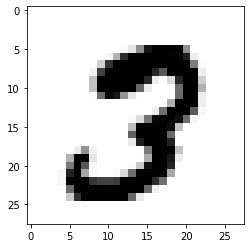

In [98]:
# print a digit between 1 to 60,000
image_index = 12345
print(y_train[image_index])

# visualize the image
%matplotlib inline
plt.imshow(x_train[image_index], cmap = 'Greys')

Next, I reshape and normalize the dataset in order to extract features from the source image. It is a necessary step to use the dataset in Keras API. 

- Reshape: Keras API requires 4-dims numpy arrays. We can see below, our dataset is 3-dims i.e. 60,000 images and 28 x 28 pixel per image in size. 
- Normalize: A neural network models always require normalized data. 

In [99]:
# shape of the raw dataset
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28)


In [100]:
# reshaping the dataset
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert to get decimal points and normalize the data by dividing it to the max value i.e. 255 
x_train = x_train.astype('float32') / 255 
x_test = x_test.astype('float32') / 255

# verifying the transformation
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Model 
Finally I build a Convolutional Neural Networks using Keras API.
***
- `Sequential` allows us to create model layer-by-layer. I can create a Sequential model by passing a list of layer instances to the constructor.
***
- `Conv2D` the objective of this layer is to extract the high-level features such as edges, from the input image.  
    1. the dimensionality of the output space of this layer,
    2. the height and width of the convolution layer,
    3. the model needs to know what input shape it should expect. 
***
- `MaxPooling2D` the Pooling layer is responsible for reducing the spatial size of the previous layer. 
    1. factors by which to downscale.  
***    
- `Flatten` removes all of the dimensions except for one.
***
- `Dense` a dense layer is just a regular layer of neurons in a neural network. Each neuron recieves input from all the neurons in the previous layer, thus densely connected. 
    1. the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input,
    2. relu or rectified linear activation function is a piecewise linear function that will output the input directly if is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.
***
- `Dropout` it is a technique used to tackle Overfitting. The Dropout method in Keras takes in a float between 0 and 1, which is the fraction of the neurons to drop. 
***
- `Dense` the final Dense layer must have 10 neurons since I have 10 number classes.
    1. softmax function or normalized exponential function can be used to represent a categorical distribution i.e. a probability distribution over ‘K’ different possible outcomes. 

In [101]:
# create the model
model = Sequential([
    Conv2D(28, kernel_size = (3, 3), input_shape = input_shape),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dense(256, activation = tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation = tf.nn.softmax)
])

Now that I have created the model, we are ready to optimize and fit the model. Compile defines the loss function, the optimizer and the metrics. These are necessary to train a neural network. I will use the `sparse_categorical_crossentropy` for loss function and `adam` for the optimizer. With the help of the optimization function, loss function learns to reduce the error in prediction.
- `sparse_categorical_crossentropy` this function is used when classes are mutually exclusive (e.g. when each sample belongs exactly to one class).
- `adam` Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks. You can read more about it [here](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c). The algorithms leverages the power of adaptive learning rates methods to find individual learning rates for each parameter.
- `accuracy` it is the fraction of predictions the model got right.
- `epochs` it is a measure of the number of times all of the training dataset are used once to update the weights.

In [102]:
# complile the model
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# fit the model
model.fit(x = x_train, y = y_train, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 30s 495us/step - loss: 0.1742 - accuracy: 0.9482
Epoch 2/10
60000/60000 [==============================] - 32s 531us/step - loss: 0.0657 - accuracy: 0.9797
Epoch 3/10
60000/60000 [==============================] - 30s 504us/step - loss: 0.0436 - accuracy: 0.9866
Epoch 4/10
60000/60000 [==============================] - 30s 506us/step - loss: 0.0339 - accuracy: 0.9884
Epoch 5/10
60000/60000 [==============================] - 31s 524us/step - loss: 0.0242 - accuracy: 0.9918
Epoch 6/10
60000/60000 [==============================] - 32s 526us/step - loss: 0.0221 - accuracy: 0.9923
Epoch 7/10
60000/60000 [==============================] - 30s 504us/step - loss: 0.0166 - accuracy: 0.9946
Epoch 8/10
60000/60000 [==============================] - 31s 513us/step - loss: 0.0154 - accuracy: 0.9946
Epoch 9/10
60000/60000 [==============================] - 31s 524us/step - loss: 0.0159 - accuracy: 0.9942
Epoch 10/10
60000/60000 [============

## Evaluation & Prediction
Lastly, I evaluate my model and achieve 98.6% accuracy with my model. I also make a prediction to verify the accuracy.

In [103]:
# evaluate the model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 93us/step


[0.06546762842676754, 0.9855999946594238]

8


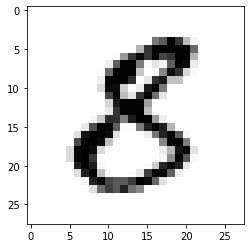

In [106]:
# print a digit between 1 to 10,000
image_index = 1234
plt.imshow(x_test[image_index].reshape(28, 28), cmap = 'Greys')

# make prediction
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

## Conclusion
For this project, my model was able to recognise handwritten digits with 98.6% accuracy. I used the CNN algorithm because it is the best deep learning algorthim for images. I have also used Keras API built on top of TensorFlow because of it is one of the best machine learning algorthim right now. I have also used the best lost function and optimizer the industry has to offer when it comes to image recognition. 